# Regressão Linear - Seguro Saúde

Hoje vamos explorar um conjunto de dados dedicado ao custo do tratamento de diferentes pacientes. O custo do tratamento depende de muitos fatores: diagnóstico, tipo de clínica, cidade de residência, idade e assim por diante. Não temos dados sobre tudo isso, mas temos alguns que podem nos ajudar a tirar algumas conclusões interessantes.

## Dataset

**Onde encontrar**

https://github.com/stedy/Machine-Learning-with-R-datasets


**Columns**

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

## Imports

In [ ]:
import requests
from io import StringIO

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
orig_url='https://drive.google.com/file/d/1GL2NYebKEOzZfX27WpQdGZqfrJ5S5Y4b/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw, encoding = "ISO-8859-1")

## Princípios da Regressao

Faremos aqui uma brincadeira priliminar para entender a intuição

In [ ]:
data.head()

#### Filtrando apenas os fumantes

In [ ]:
data_smokers = data[data['smoker']=="yes"]
data_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


### Tentando estimar os gastos (charges) a partir do IMC (BMI)

Text(0.5, 1.0, 'BMI x Charges')

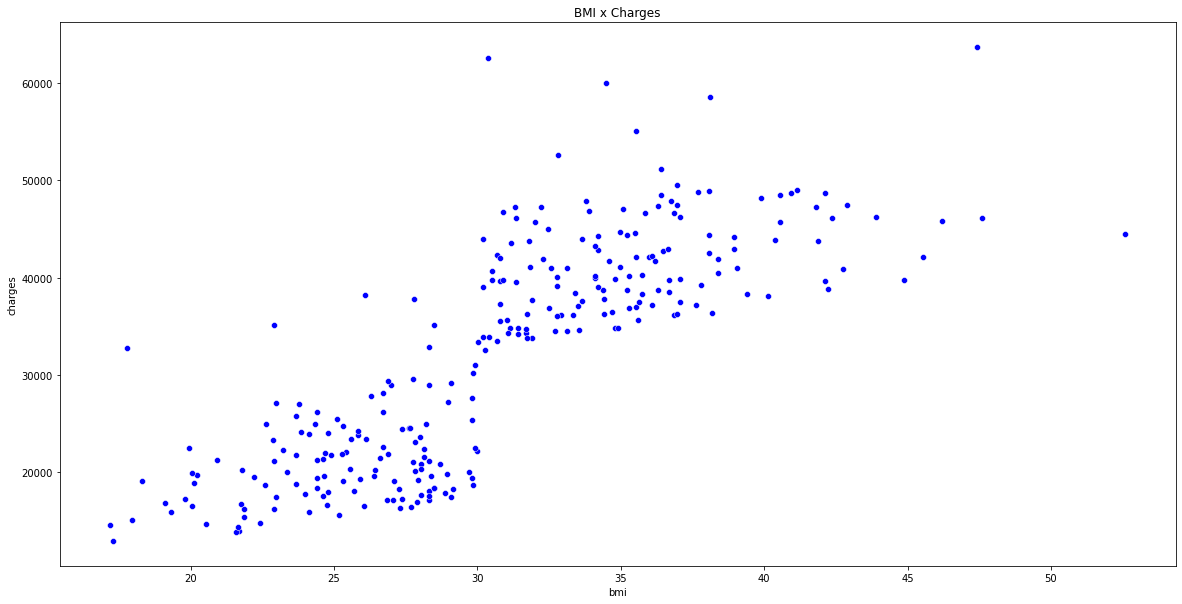

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x='bmi',y='charges',data=data_smokers,color='b')
ax.set_title('BMI x Charges')

In [ ]:
def h(x, b_0, b_1):
  return b_0 + b_1 * x

In [ ]:
X = data_smokers['bmi'].values
y = data_smokers['charges'].values

In [ ]:
r = np.random.RandomState(12)
idx = r.choice(np.arange(len(X)), 10, replace=False)
X_sample = X[idx]
y_sample = y[idx]

In [ ]:
y_sample_pred = h(X_sample, -150, 800)
y_sample_pred

array([26890., 19154., 23714., 21530., 17102., 20570., 27394., 22346.,
       17786., 22250.])

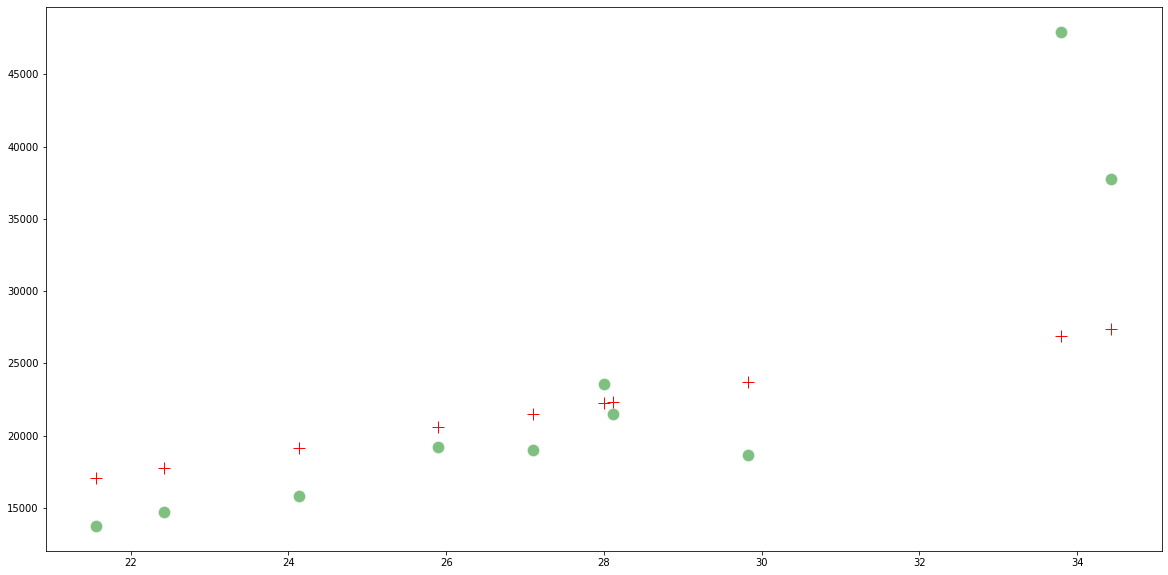

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=X_sample,y=y_sample,color='g', alpha=.5, marker='o', s=150)
ax = sns.scatterplot(x=X_sample,y=y_sample_pred,color='r', marker='+', s=150)

In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_sample, y_sample_pred))

MAE: 5226.755534999999


In [ ]:
from sklearn.linear_model import LinearRegression

est = LinearRegression()

X_sample_2d = X_sample.reshape(-1, 1)

est.fit(X_sample_2d, y_sample)

y_sample_pred = est.predict(X_sample_2d)

print('MAE:', mean_absolute_error(y_sample, y_sample_pred))

print("O coeficiente b_0 eh:   {}".format(est.intercept_))
print("O coeficiente b_1 eh:   {}".format(est.coef_[0]))


MAE: 3555.6473163305536
O coeficiente b_0 eh:   -38307.655463807154
O coeficiente b_1 eh:   2233.80284672105


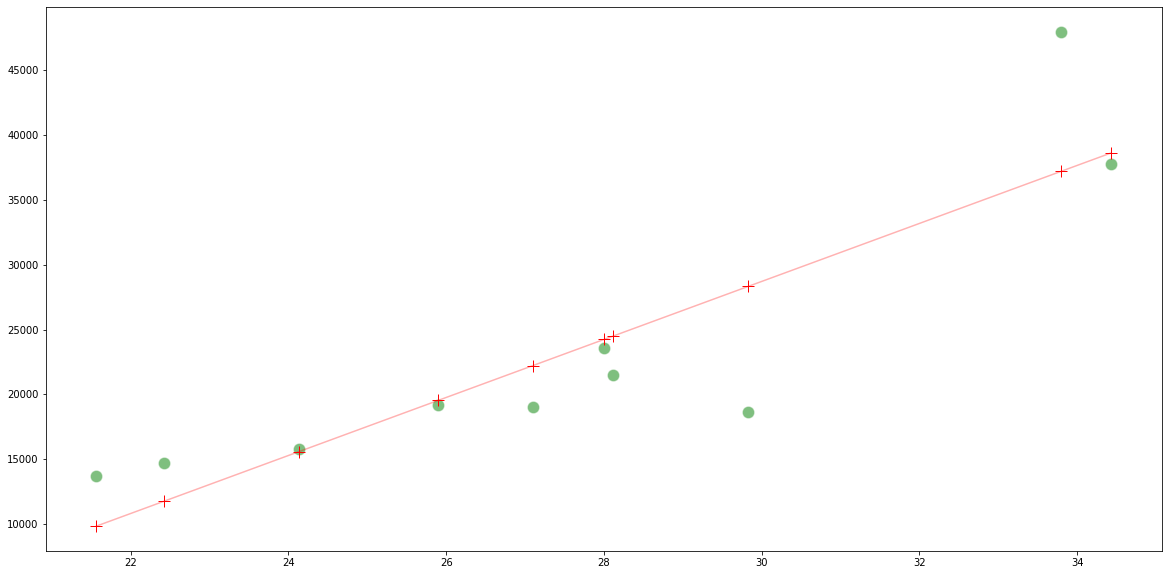

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=X_sample,y=y_sample,color='g', alpha=.5, marker='o', s=150)
ax = sns.scatterplot(x=X_sample,y=y_sample_pred,color='r', marker='+', s=150)
ax = sns.lineplot(x=X_sample,y=y_sample_pred,color='r', alpha=.3)

### Estimando em todo o dataset

In [ ]:
X = data_smokers['bmi'].values
X_2d = X.reshape(-1, 1)
y = data_smokers['charges'].values

In [ ]:
print(X_2d[:5])

[[27.9 ]
 [26.29]
 [42.13]
 [35.3 ]
 [31.92]]


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

est = LinearRegression()
est.fit(X_2d, y)

y_pred = est.predict(X_2d)

print('MAE:', mean_absolute_error(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))
print('RMSE: ', mean_squared_error(y,y_pred,squared=False))

print('r2_score: ', r2_score(y,y_pred))

print("O coeficiente b0 eh:   {}".format(est.intercept_))
print("O coeficiente b1 eh:   {}".format(est.coef_[0]))


MAE: 5192.770701345449
MSE: 46397859.25278597
RMSE:  6811.59740830196
r2_score:  0.6504109694921547
O coeficiente b0 eh:   -13186.57632276294
O coeficiente b1 eh:   1473.1062547014208


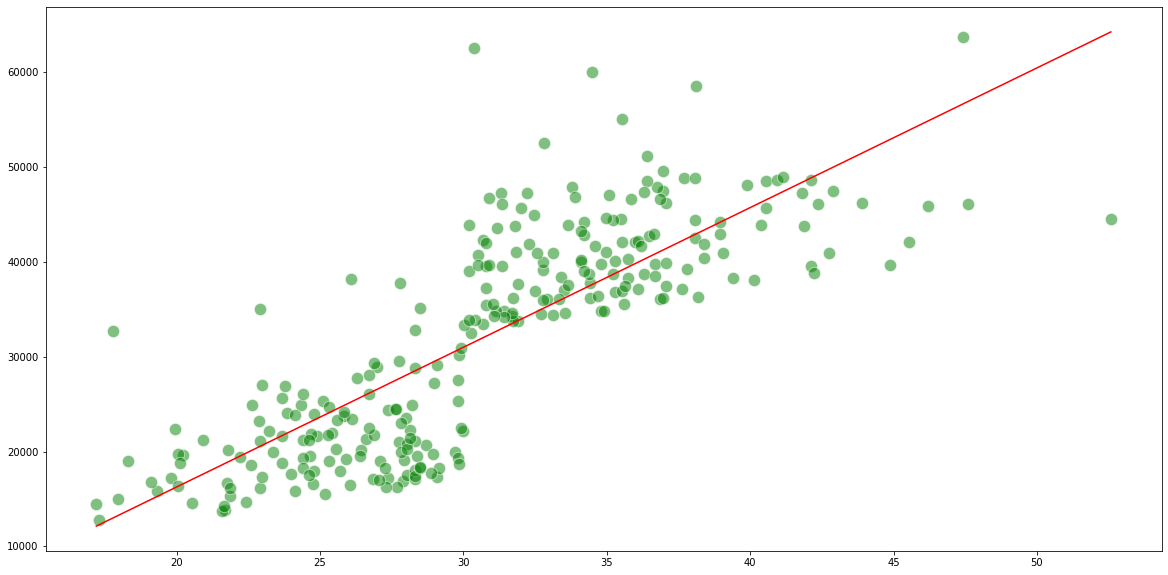

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=X,y=y,color='g', alpha=.5, marker='o', s=150)
ax = sns.lineplot(x=X,y=y_pred,color='r')

## EDA e Preprocessamento

In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Estamos com sorte! Não encontramos NaN.

Vamos agora codificar os variáveis categóricas.

#### Correlacoes

In [ ]:
data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

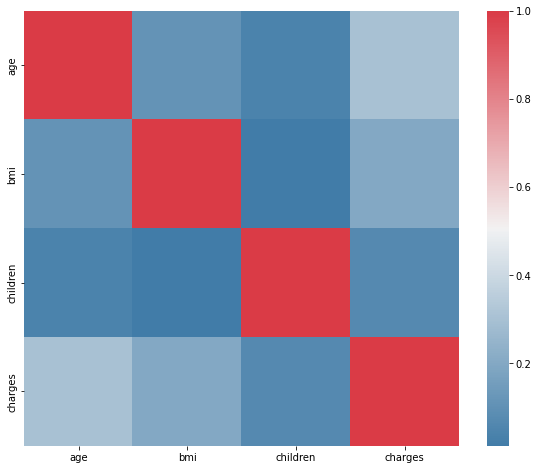

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

## Distribuicao para os gastos

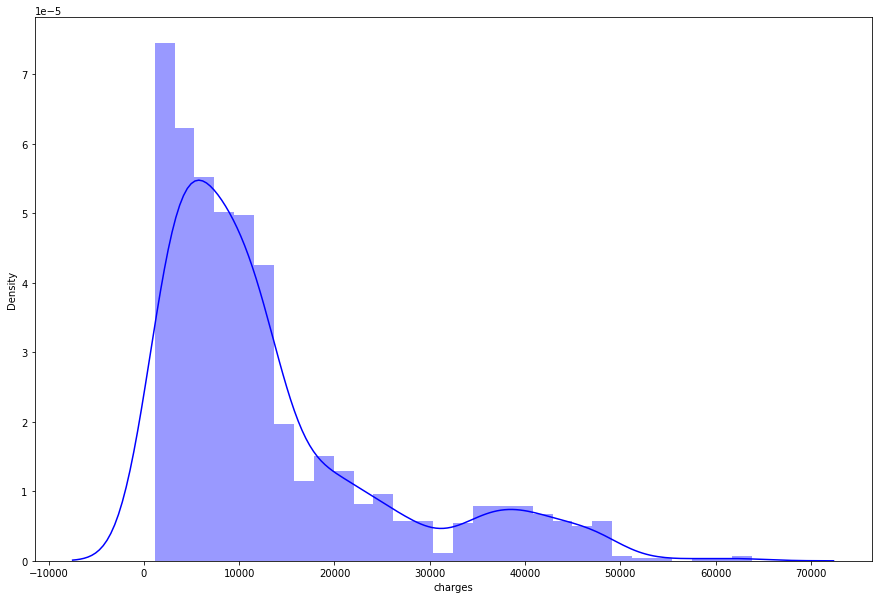

In [ ]:
f=plt.figure(figsize=(15,10))
sns.distplot(data['charges'],color='b')


#### Vamos investigar melhor os fumantes

Text(0.5, 1.0, 'Distribuicao Nao-fumantes')

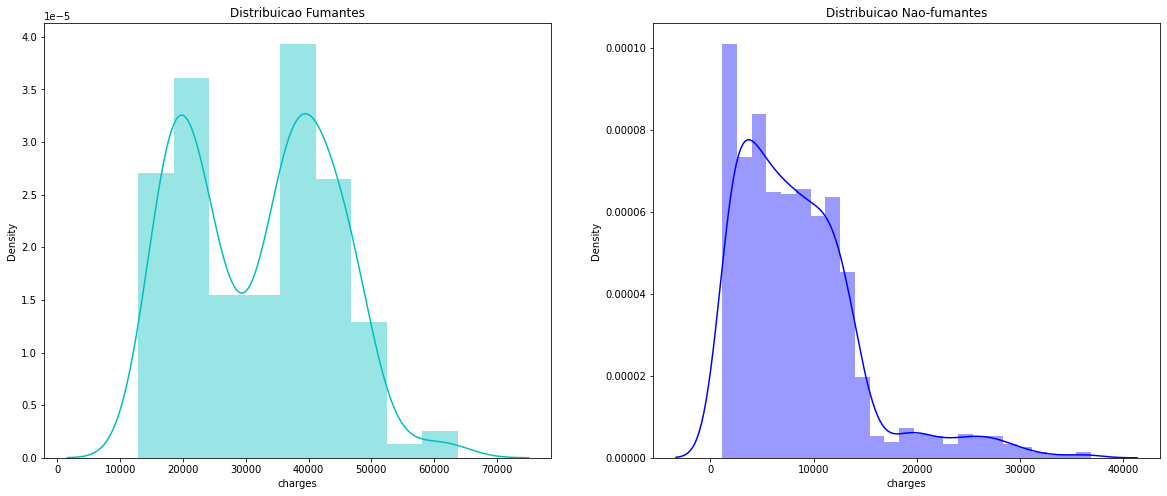

In [ ]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == "yes")]["charges"],color='c',ax=ax)
ax.set_title('Distribuicao Fumantes')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == "no")]['charges'],color='b',ax=ax)
ax.set_title('Distribuicao Nao-fumantes')

<Figure size 1440x576 with 0 Axes>

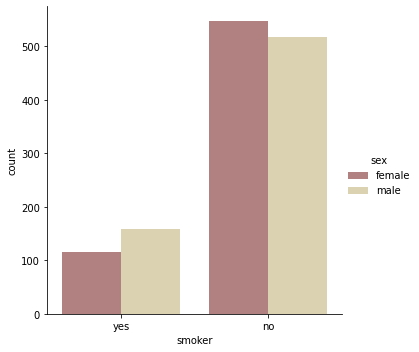

In [ ]:
f= plt.figure(figsize=(20,8))
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

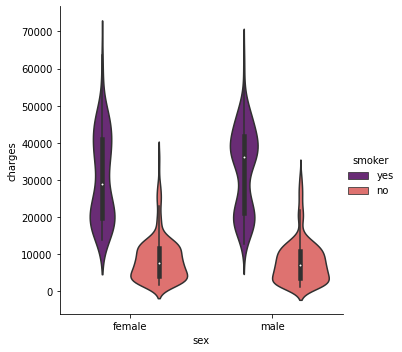

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

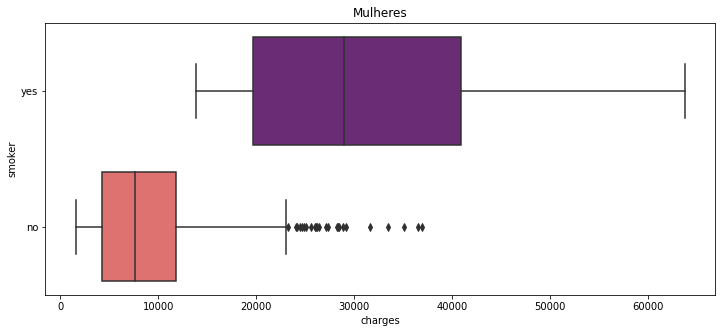

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Mulheres")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == "female")] , orient="h", palette = 'magma')

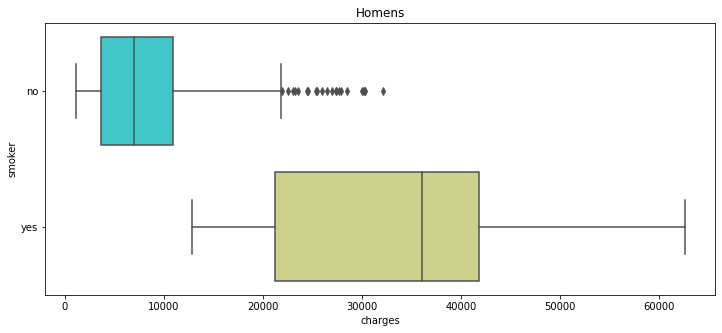

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Homens")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == "male")] , orient="h", palette = 'rainbow')

## Distribuicao para a Idade

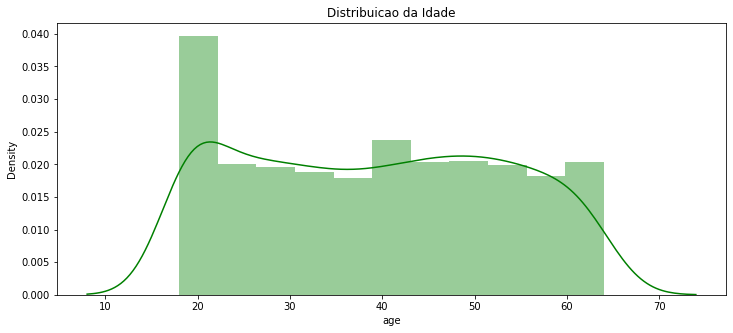

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuicao da Idade")
ax = sns.distplot(data["age"], color = 'g')

#### Vamos investigar melhor os fumantes

Text(0.5, 1.0, 'Mais novos que 20')

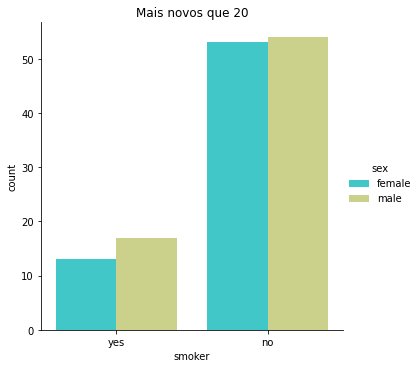

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age < 20)])
plt.title("Mais novos que 20")

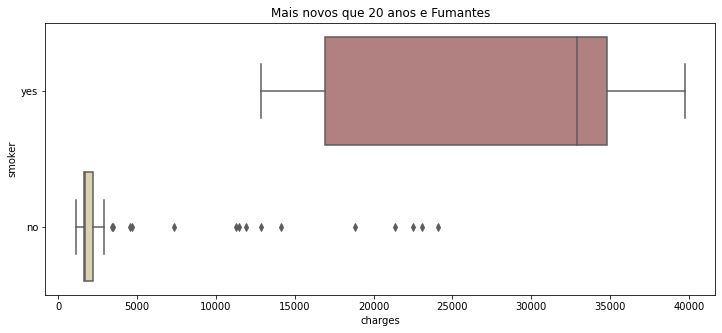

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Mais novos que 20 anos e Fumantes")
sns.boxplot(y="smoker", x="charges", data = data[(data.age < 20)] , orient="h", palette = 'pink')

Idade x Gastos (Não Fumantes)

Text(0.5, 1.0, 'Idade x Gastos (Fumantes)')

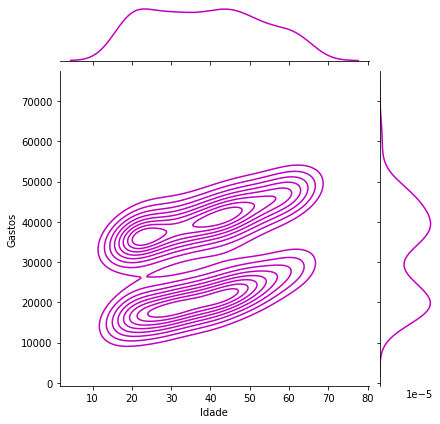

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == "yes")],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Idade", "Gastos")
ax.set_title('Idade x Gastos (Fumantes)')

Idade x Gastos (Fumantes)

Text(0.5, 1.0, 'Idade x Gastos (Não Fumantes)')

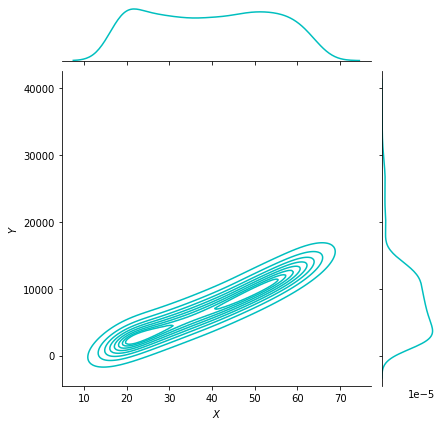

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == "no")],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Idade x Gastos (Não Fumantes)')

Idade x Gastos (Fumantes e Não Fumantes)

Text(0.5, 1.0, 'Idade x Gastos')

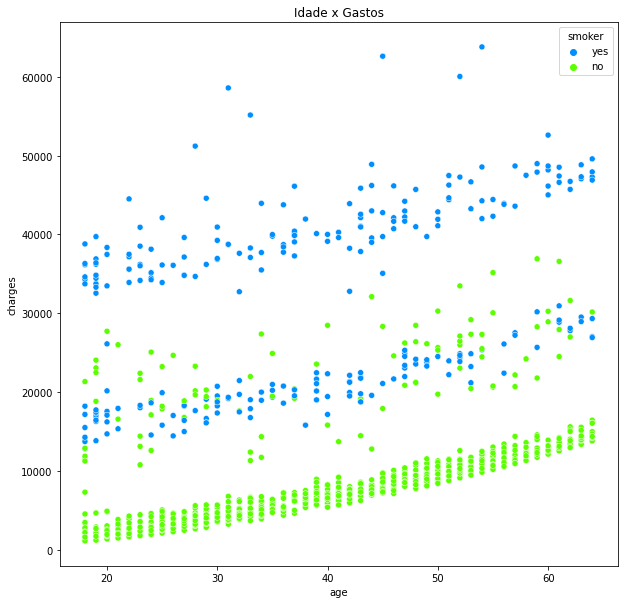

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='age',y='charges',data=data,palette='gist_rainbow_r',hue='smoker')
ax.set_title('Idade x Gastos')

Idade x Gastos (Fumantes)

Text(0.5, 1.0, 'Idade x Gastos (Fumantes e Não Fumantes)')

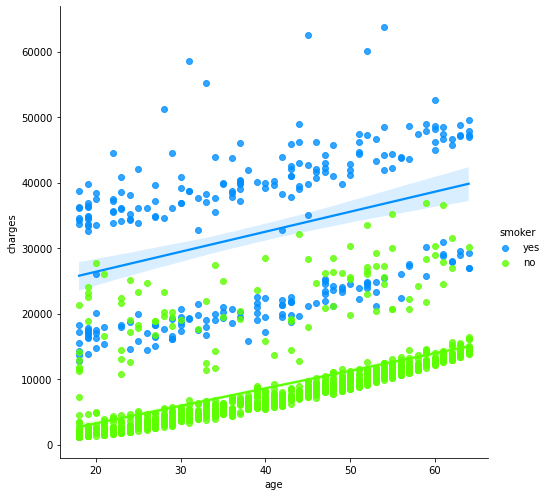

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'gist_rainbow_r', size = 7)
ax.set_title('Idade x Gastos (Fumantes e Não Fumantes)')

## Distribuicao do IMC (BMI)

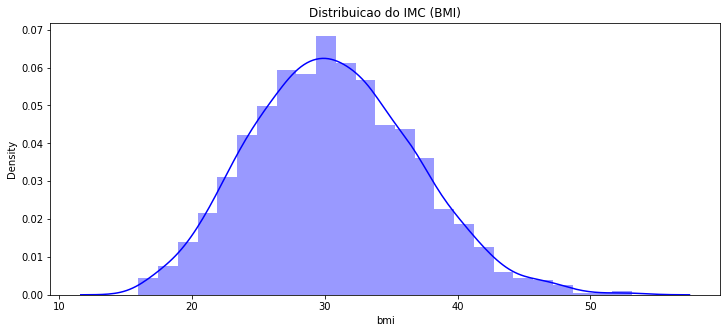

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuicao do IMC (BMI)")
ax = sns.distplot(data["bmi"], color = 'b')

Gastos para IMC (BMI) > 30, limiar que caracteriza "obesidade".


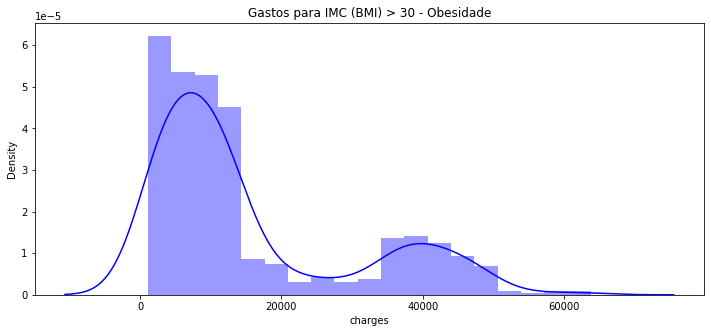

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Gastos para IMC (BMI) > 30 - Obesidade")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'b')

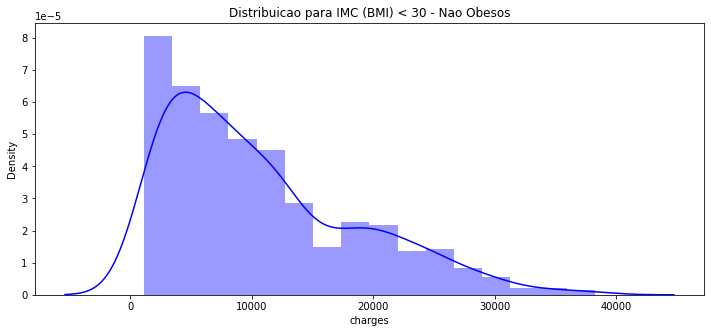

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuicao para IMC (BMI) < 30 - Nao Obesos")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

BMI > 30 implica em mais custos!

Text(0.5, 1.0, 'Distribuição: BMI e Gastos')

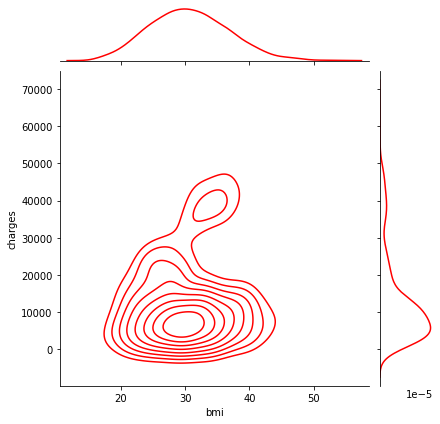

In [ ]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("bmi", "charges")
ax.set_title('Distribuição: BMI e Gastos')


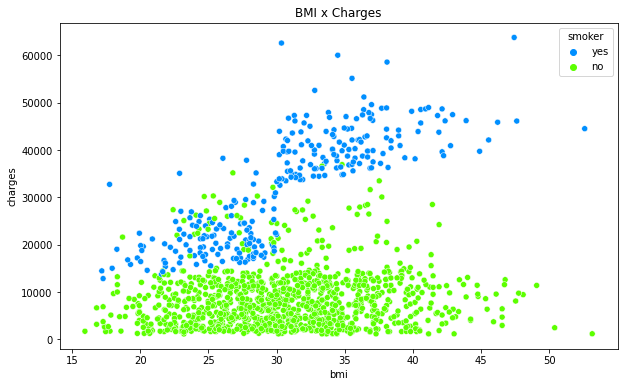

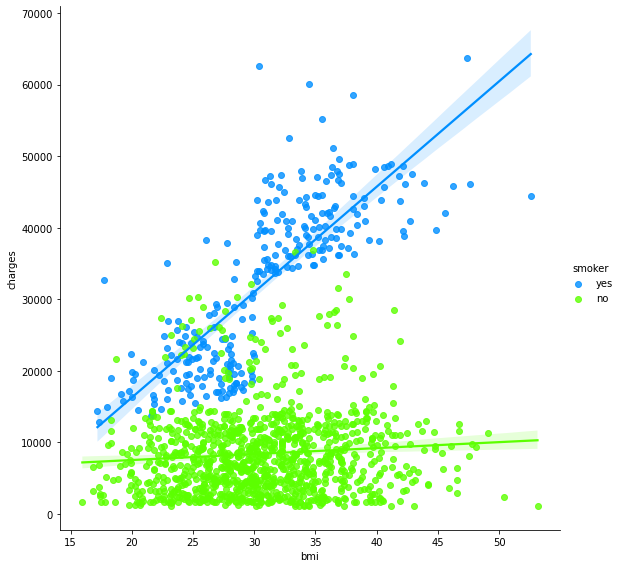

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='gist_rainbow_r',hue='smoker')
ax.set_title('BMI x Charges')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'gist_rainbow_r', size = 8)

Quantidade de filhos por paciente


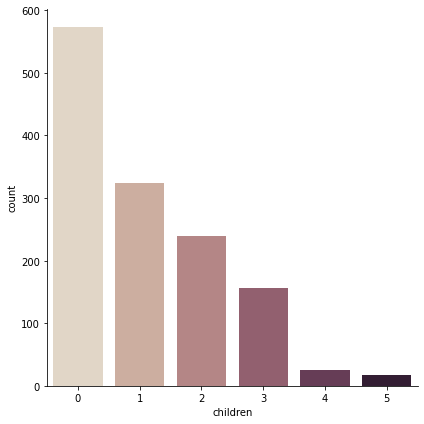

In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Fumantes vs Não Fumantes (Com algum filho)

Text(0.5, 1.0, 'Fumantes vs Não Fumantes (com algum filho)')

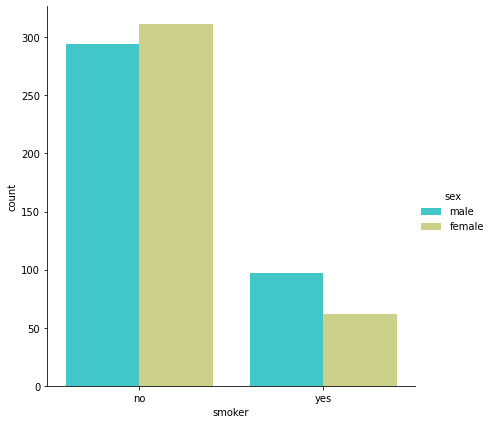

In [ ]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Fumantes vs Não Fumantes (com algum filho)')

## Regressão Linear

#### One Hot Encoding usando Pandas ```get_dummies```



In [ ]:
nominal_attributes = ['sex','smoker','region']
dummy = pd.get_dummies(data,columns=nominal_attributes)
data = dummy
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Separando Variáveis Independentes (X) e Dependente (y)

In [ ]:
X = data.drop(columns=['charges']).values
y = data['charges'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X[:5])

[[0.02173913 0.3212268  0.         1.         0.         0.
  1.         0.         0.         0.         1.        ]
 [0.         0.47914985 0.2        0.         1.         1.
  0.         0.         0.         1.         0.        ]
 [0.2173913  0.45843422 0.6        0.         1.         1.
  0.         0.         0.         1.         0.        ]
 [0.32608696 0.18146355 0.         0.         1.         1.
  0.         0.         1.         0.         0.        ]
 [0.30434783 0.34759214 0.         0.         1.         1.
  0.         0.         1.         0.         0.        ]]


#### Fit

In [ ]:
est = LinearRegression()
est.fit(X, y)

y_pred = est.predict(X)
print('r2_score: {}'.format(r2_score(y,y_pred)))

r2_score: 0.7441024186044558


#### Imprimindo os Coeficientes

In [ ]:
df_X = data.drop(columns=['charges'])
for idx, col_name in enumerate(df_X.columns):
    print("O coeficiente para {} eh:   {}".format(col_name, est.coef_[idx]))

O coeficiente para age eh:   11606.26795448445
O coeficiente para bmi eh:   13067.946353442809
O coeficiente para children eh:   2015.482112978406
O coeficiente para sex_female eh:   -1.5413840472730634e+18
O coeficiente para sex_male eh:   -1.5413840472730652e+18
O coeficiente para smoker_no eh:   -1.8099249541541142e+17
O coeficiente para smoker_yes eh:   -1.8099249541538704e+17
O coeficiente para region_northeast eh:   1.1654554090332672e+18
O coeficiente para region_northwest eh:   1.1654554090332675e+18
O coeficiente para region_southeast eh:   1.165455409033266e+18
O coeficiente para region_southwest eh:   1.1654554090332657e+18


#### Verificando o r-quadrado de vários modelos

In [ ]:
for c in df_X.columns: # use df.columns para ver todas
  X = data.loc[:, [c]].values
  est.fit(X, y)
  y_pred = est.predict(X)
  print('r2_score para {} eh: {}'.format(c, r2_score(y,y_pred)))

r2_score para age eh: 0.08940589967885804
r2_score para bmi eh: 0.03933913991786264
r2_score para children eh: 0.004623758854459203
r2_score para sex_female eh: 0.003282380391360862
r2_score para sex_male eh: 0.003282380391360862
r2_score para smoker_no eh: 0.6197648148218988
r2_score para smoker_yes eh: 0.6197648148218988
r2_score para region_northeast eh: 4.0306896767816625e-05
r2_score para region_northwest eh: 0.0015923981740858517
r2_score para region_southeast eh: 0.005473269972077199
r2_score para region_southwest eh: 0.0018671066054624097


## Regressao Polinomial

#### Separando Variáveis Independentes (X) e Dependente (y)

In [ ]:
X = data.drop(columns=['charges']).values
y = data['charges'].values

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X[:5])

[[0.02173913 0.3212268  0.         1.         0.         0.
  1.         0.         0.         0.         1.        ]
 [0.         0.47914985 0.2        0.         1.         1.
  0.         0.         0.         1.         0.        ]
 [0.2173913  0.45843422 0.6        0.         1.         1.
  0.         0.         0.         1.         0.        ]
 [0.32608696 0.18146355 0.         0.         1.         1.
  0.         0.         1.         0.         0.        ]
 [0.30434783 0.34759214 0.         0.         1.         1.
  0.         0.         1.         0.         0.        ]]


#### Fit

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# criando o pipeline
Input=[('polyfeatures',PolynomialFeatures(degree=2)),('regmodel',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(X, y)

Pipeline(steps=[('polyfeatures', PolynomialFeatures()),
                ('regmodel', LinearRegression())])

#### Predicoes

In [ ]:
y_pred = pipe.predict(X)

#### Avaliacao

In [ ]:
print('r2_score: ', r2_score(y,y_pred))

r2_score:  0.8451180979671548


#### Imprimindo os coeficientes

In [ ]:
poly_est = pipe.named_steps['regmodel']
df_X = data.drop(columns=['charges'])

for idx in range (len(poly_est.coef_)):
  print("O coeficiente {} eh {}".format(idx, poly_est.coef_[idx]))

O coeficiente 0 eh 2.515986498134961e-14
O coeficiente 1 eh 1.691112119105704e+16
O coeficiente 2 eh 4.396680652889341e+16
O coeficiente 3 eh -5564077501653714.0
O coeficiente 4 eh 2673439194182997.0
O coeficiente 5 eh -2.179921051864739e+16
O coeficiente 6 eh -3.082146769508988e+16
O coeficiente 7 eh -4.291075261165829e+16
O coeficiente 8 eh 1.3936748980576464e+17
O coeficiente 9 eh -2.5592461251806666e+17
O coeficiente 10 eh 3.926329273955204e+17
O coeficiente 11 eh 2.0699673249306838e+17
O coeficiente 12 eh 8415.552675660323
O coeficiente 13 eh 669.9051177584324
O coeficiente 14 eh -1217.4990178889104
O coeficiente 15 eh -6.393688862529381e+16
O coeficiente 16 eh -6.393688862529293e+16
O coeficiente 17 eh 4689098568891112.0
O coeficiente 18 eh 4689098568891321.0
O coeficiente 19 eh 4.233666886534773e+16
O coeficiente 20 eh 4.2336668865348424e+16
O coeficiente 21 eh 4.233666886535044e+16
O coeficiente 22 eh 4.233666886535006e+16
O coeficiente 23 eh -7779.512002578742
O coeficiente 24

#### Avaliando para vários modelos simples

In [ ]:
# criando o pipeline
Input=[('polyfeatures',PolynomialFeatures(degree=2)),('regmodel',LinearRegression())]
pipe=Pipeline(Input)

for c in data.columns: # use data.columns para ver todas
  X = data.loc[:, [c]].values
  pipe.fit(X, y)
  y_pred = pipe.predict(X)
  print('r2_score para {} eh: {}'.format(c, r2_score(y,y_pred)))
  poly_est = pipe.named_steps['regmodel']
  for idxx in range (len(poly_est.coef_)):
    print("O coeficiente {} eh {}".format(idxx, poly_est.coef_[idxx]))

r2_score para age eh: 0.0905935481862109
O coeficiente 0 eh 0.0
O coeficiente 1 eh 64.57305277452613
O coeficiente 2 eh 2.4389087066987827
r2_score para bmi eh: 0.040118964659702216
O coeficiente 0 eh 0.0
O coeficiente 1 eh 813.9749575731105
O coeficiente 2 eh -6.662322630063159
r2_score para children eh: 0.008534832643222856
O coeficiente 0 eh 0.0
O coeficiente 1 eh 2190.103881038395
O coeficiente 2 eh -454.00816672941164
r2_score para charges eh: 1.0
O coeficiente 0 eh 0.0
O coeficiente 1 eh 0.9999999999940697
O coeficiente 2 eh 1.1102230246251565e-16
r2_score para sex_female eh: 0.002537278550691191
O coeficiente 0 eh 0.0
O coeficiente 1 eh 1.3905026168750762e+17
O coeficiente 2 eh -1.3905026168750966e+17
r2_score para sex_male eh: 0.0024634003539031335
O coeficiente 0 eh 0.0
O coeficiente 1 eh -1.4682618543429386e+17
O coeficiente 2 eh 1.4682618543429594e+17
r2_score para smoker_no eh: 0.6194733962988388
O coeficiente 0 eh 0.0
O coeficiente 1 eh -1.3681376270049069e+17
O coeficient

## Regressão Linear (Apenas Fumantes)

#### Filtrando apenas os fumantes

In [ ]:
data_smokers = data[data['smoker_yes']==1]

#### Separando Variáveis Independentes (X) e Dependente (y)

In [ ]:
X = data_smokers.drop(columns=['charges']).values
y = data_smokers['charges'].values

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X[:5])

[[0.02173913 0.30252932 0.         1.         0.         0.
  0.         0.         0.         0.         1.        ]
 [0.95652174 0.25702981 0.         1.         0.         0.
  0.         0.         0.         1.         0.        ]
 [0.19565217 0.70467712 0.         0.         1.         0.
  0.         0.         0.         1.         0.        ]
 [0.26086957 0.51165748 0.         0.         1.         0.
  0.         0.         0.         0.         1.        ]
 [0.34782609 0.41613678 0.2        1.         0.         0.
  0.         1.         0.         0.         0.        ]]


#### Fit

In [ ]:
est = LinearRegression()
est.fit(X, y)

y_pred = est.predict(X)

#### Avaliacao

In [ ]:
print('r2_score: ', r2_score(y,y_pred))

r2_score:  0.7579019819278512


#### Imprimindo os Coeficientes

In [ ]:
df_X = data_smokers.drop(columns=['charges','smoker_no', 'smoker_yes'])
for idx, col_name in enumerate(df_X.columns):
    print("O coeficiente para {} eh:   {}".format(col_name, est.coef_[idx]))

O coeficiente para age eh:   12300.601767385957
O coeficiente para bmi eh:   52212.182110987604
O coeficiente para children eh:   913.68275292619
O coeficiente para sex_female eh:   194.0608243484071
O coeficiente para sex_male eh:   -194.06082434839846
O coeficiente para region_northeast eh:   7.275957614183426e-12
O coeficiente para region_northwest eh:   1.6370904631912708e-11
O coeficiente para region_southeast eh:   754.585020702275
O coeficiente para region_southwest eh:   64.86699592106197


#### Verificando o r-quadrado de vários modelos

In [ ]:
for c in df_X.columns: # use df.columns para ver todas
  X = data_smokers.loc[:, [c]].values
  est.fit(X, y)
  y_pred = est.predict(X)
  print('r2_score para {} eh: {}'.format(c, r2_score(y,y_pred)))

r2_score para age eh: 0.13558924096084068
r2_score para bmi eh: 0.6504109694921547
r2_score para children eh: 0.0012920434428739247
r2_score para sex_female eh: 0.01024671604015881
r2_score para sex_male eh: 0.01024671604015881
r2_score para region_northeast eh: 0.013775626113763928
r2_score para region_northwest eh: 0.006986061411987099
r2_score para region_southeast eh: 0.029264475536200374
r2_score para region_southwest eh: 9.68845249088579e-05
